In [2]:
!pip install locust pandas matplotlib

37.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/Users/robert/.pyenv/versions/3.8.12/envs/.venv/bin/python3.8 -m pip install --upgrade pip' command.


# Setup

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from enum import Enum

In [4]:
plt.rcParams["figure.autolayout"] = True

In [16]:
def plot_history(ds, title):
    fig, axes = plt.subplots(2,2,figsize=(8,5))
    for ax in axes.flatten():
        ax.remove()
    ax0 = plt.subplot2grid((2,2), (0,0), colspan=1, fig=fig)
    ax1 = plt.subplot2grid((2,2), (0,1), colspan=1, fig=fig)
    ax3 = plt.subplot2grid((2,2), (1,0), colspan=2, fig=fig)

    fig.suptitle(title, fontsize=16)

    ax0.title.set_text('Total Requests/Failures over time')
    ax0.set_ylabel("Count")
    ds.iloc[:,17:19].plot(ax=ax0)

    ax1.title.set_text('Requests/Failures per second over time')
    ax1.set_ylabel("Count/s")
    ds.iloc[:,4:6].plot(ax=ax1)
    
    ax3.title.set_text('Response Time over time')
    ax3.set_ylabel("Response Time(ms)")
    ax3.set_yscale('log')
    response_time = ds.iloc[:,19:23]
    ax3.set_xlim([response_time.idxmin().min(), response_time.idxmax().max()])
    response_time.plot(ax=ax3)

# Locust

## Localhost

In [142]:
!locust --csv=6m/localhost --headless --users 100 --spawn-rate 100 --run-time 6m -f locustfile.py -H http://0.0.0.0:8080

[2022-11-15 13:33:01,788] RobBookPro.local/INFO/locust.main: Run time limit set to 360 seconds
[2022-11-15 13:33:01,788] RobBookPro.local/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-15 13:33:01,790] RobBookPro.local/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-15 13:33:01,802] RobBookPro.local/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-----

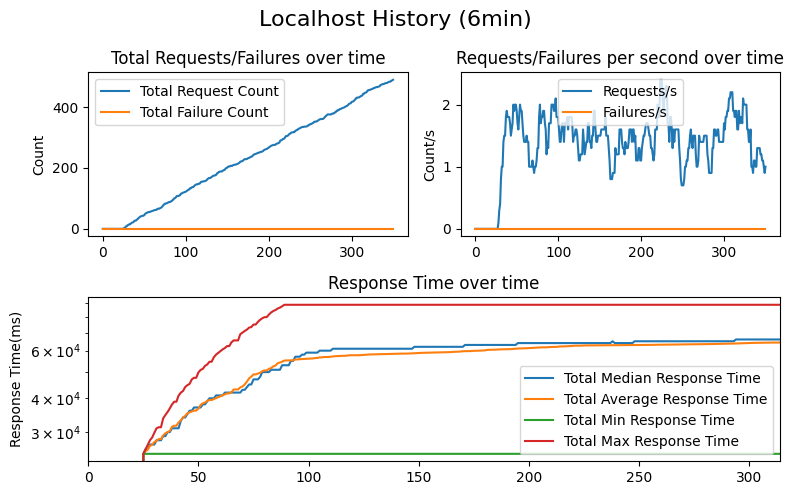

In [29]:
localhost6m = pd.read_csv("6m/localhost_stats_history.csv")
plot_history(localhost6m, "Localhost History (6min)")

## Scalesets

In [166]:
!locust --csv=3m/scalesets --headless --users 100 --spawn-rate 100 --run-time 3m -f locustfile.py -H http://20.19.163.131

[2022-11-22 18:58:16,235] RobBookPro/INFO/locust.main: Run time limit set to 360 seconds
[2022-11-22 18:58:16,235] RobBookPro/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-22 18:58:16,237] RobBookPro/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-22 18:58:16,250] RobBookPro/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|-----

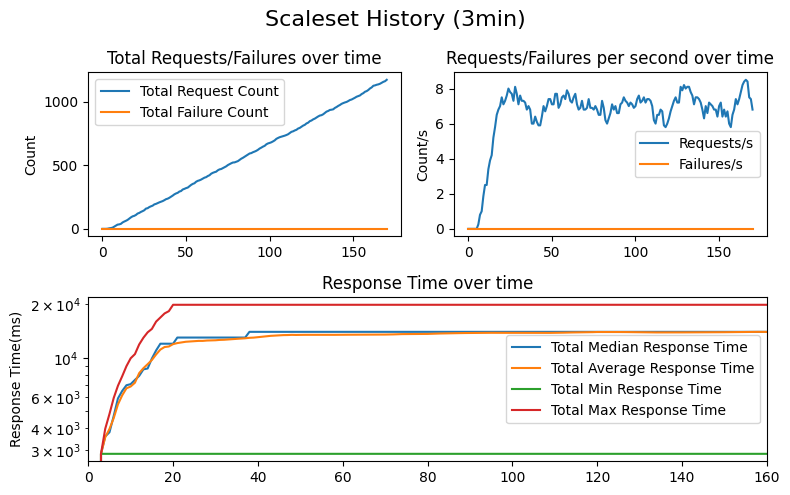

In [18]:
scaleset3m = pd.read_csv("3m/scalesets_stats_history.csv")
plot_history(scaleset3m, "Scaleset History (3min)")

In [ ]:
!locust --csv=6m/scalesets --headless --users 100 --spawn-rate 100 --run-time 6m -f locustfile.py -H http://20.19.163.131

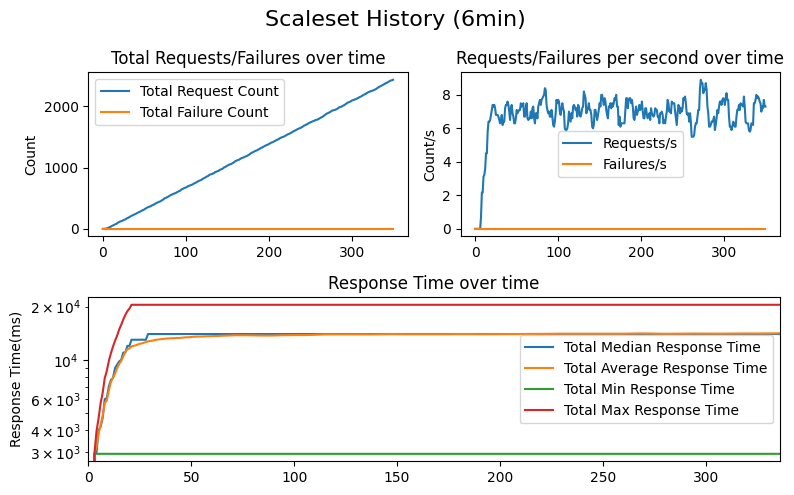

In [19]:
scaleset6m = pd.read_csv("6m/scalesets_stats_history.csv")
plot_history(scaleset6m, "Scaleset History (6min)")

## Webapps

In [175]:
!locust --csv=3m/webapp --headless --users 100 --spawn-rate 100 --run-time 3m -f locustfile.py -H https://roberthmoller-lab2webapp.azurewebsites.net

[2022-11-22 22:03:35,061] RobBookPro/INFO/locust.main: Run time limit set to 180 seconds
[2022-11-22 22:03:35,062] RobBookPro/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-22 22:03:35,064] RobBookPro/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-22 22:03:35,077] RobBookPro/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|-----

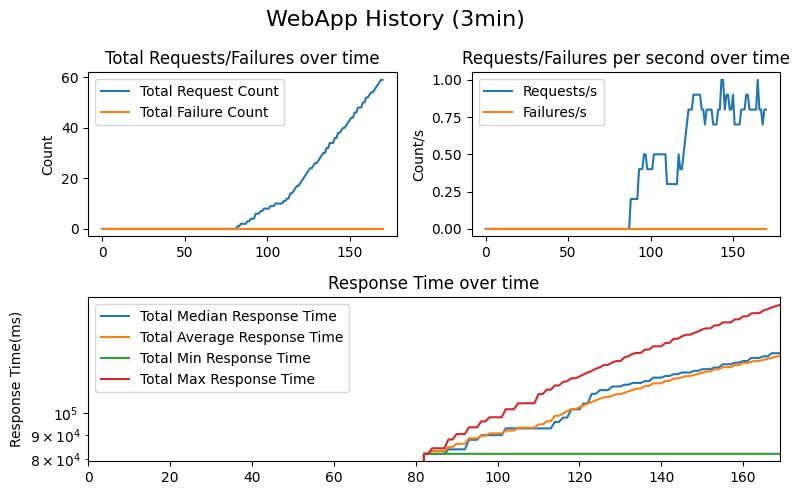

In [20]:
webapp3m = pd.read_csv("3m/webapp_stats_history.csv")
plot_history(webapp3m, "WebApp History (3min)")

In [177]:
!locust --csv=6m/webapp --headless --users 100 --spawn-rate 100 --run-time 6m -f locustfile.py -H https://roberthmoller-lab2webapp.azurewebsites.net

[2022-11-22 22:08:57,827] RobBookPro/INFO/locust.main: Run time limit set to 360 seconds
[2022-11-22 22:08:57,828] RobBookPro/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-22 22:08:57,830] RobBookPro/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-22 22:08:57,844] RobBookPro/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|-----

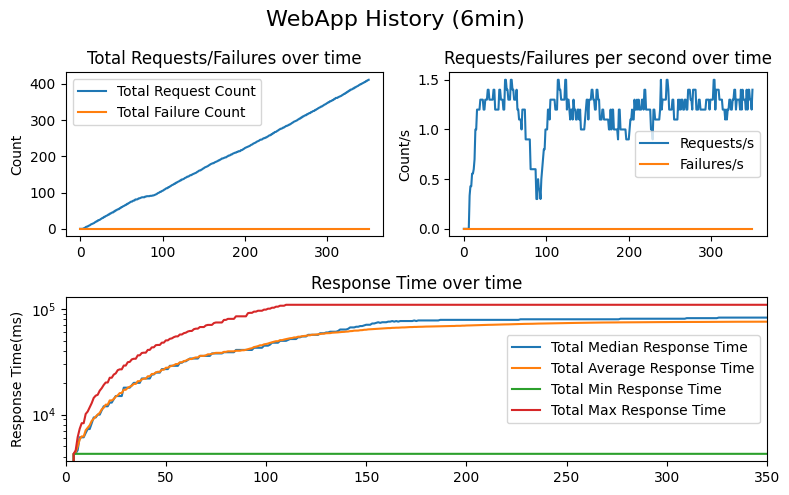

In [22]:
webapp6m = pd.read_csv("6m/webapp_stats_history.csv")
plot_history(webapp6m, "WebApp History (6min)")

## Functions

In [10]:
!locust --csv=3m/function --headless --users 100 --spawn-rate 100 --run-time 3m -f locustfile.py -H https://integral.azurewebsites.net/api

[2022-11-23 15:31:44,476] RobBookPro.local/INFO/locust.main: Run time limit set to 180 seconds
[2022-11-23 15:31:44,476] RobBookPro.local/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-23 15:31:44,479] RobBookPro.local/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-23 15:31:44,492] RobBookPro.local/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-----

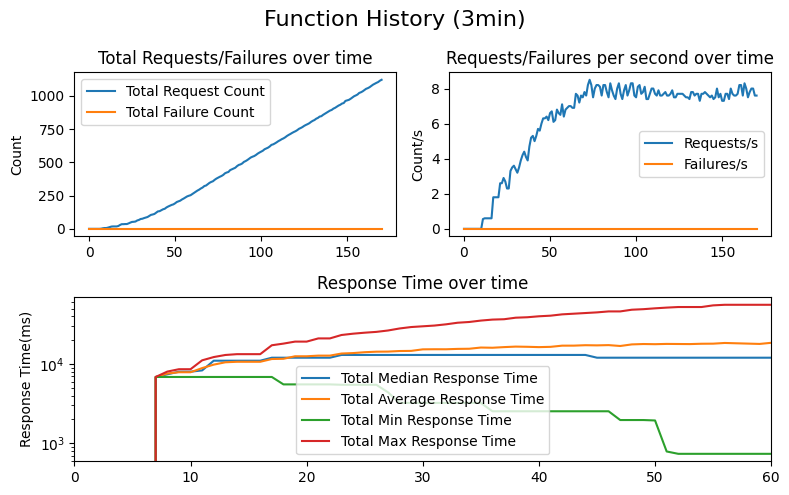

In [23]:
functions3m = pd.read_csv("3m/function_stats_history.csv")
plot_history(functions3m, "Function History (3min)")

In [25]:
!locust --csv=6m/function --headless --users 100 --spawn-rate 100 --run-time 6m -f locustfile.py -H https://integral.azurewebsites.net/api

329.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[2022-11-23 21:06:31,477] RobBookPro.local/INFO/locust.main: Run time limit set to 360 seconds
[2022-11-23 21:06:31,477] RobBookPro.local/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-23 21:06:31,479] RobBookPro.local/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-23 21:06:31,493] RobBookPro.local/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-----

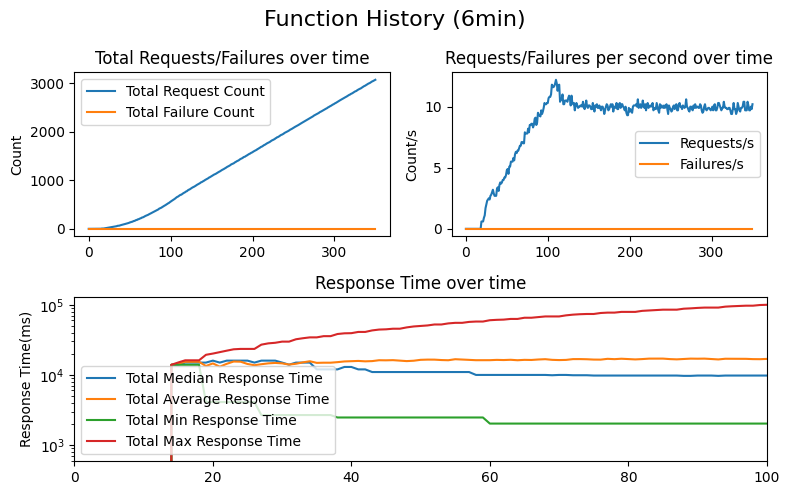

In [26]:
functions6m = pd.read_csv("6m/function_stats_history.csv")
plot_history(functions6m, "Function History (6min)")

# Comparrison

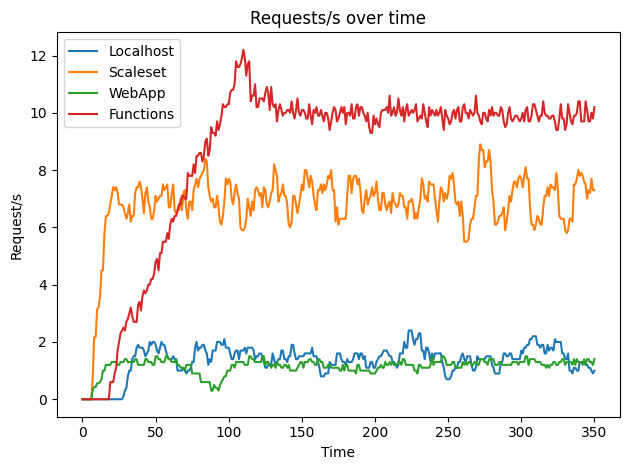

In [48]:
def compare_history(dss):
    for name, ds in dss:
       plt.plot(ds.iloc[:,4], label=name)
        
    plt.ylabel("Request/s")
    plt.xlabel("Time")
    plt.title("Requests/s over time")
    plt.legend()
    plt.show()

compare_history([("Localhost",localhost6m), ("Scaleset", scaleset6m), ("WebApp",webapp6m), ("Functions",functions6m)])
